<a href="https://colab.research.google.com/github/CSC345DSLoveYou/HousePrice_DSLoveyou/blob/master/HousePrices_DSLoveYou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you want to save the file, this ipynb file will save on the **CSC345-DS-Project shared drive** when you write the code that here.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
pip install --upgrade pingouin

Requirement already up-to-date: pingouin in /usr/local/lib/python3.6/dist-packages (0.3.8)


In [3]:
import seaborn as sns


In [4]:
print(pd.__version__)

1.1.2


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dfTrain = pd.read_csv("/content/drive/Shared drives/CSC345-DS-Project/house-prices-advanced-regression-techniques/train.csv"
        , sep = ",")
print('%i subjects and %i columns' % dfTrain.shape)
dfTrain.head()


1460 subjects and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
dfTest = pd.read_csv("/content/drive/Shared drives/CSC345-DS-Project/house-prices-advanced-regression-techniques/test.csv"
        , sep = ",")
print('%i subjects and %i columns' % dfTest.shape)

dfTest.head()

1459 subjects and 80 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
dfSample = pd.read_csv("/content/drive/Shared drives/CSC345-DS-Project/house-prices-advanced-regression-techniques/sample_submission.csv"
        , sep = ",")
print('%i subjects and %i columns' % dfSample.shape)

dfSample.head()

1459 subjects and 2 columns


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [9]:
#The relation of YearBuilt and GarageArea 1
import pingouin as pg
pg.corr(x=dfTrain['YearBuilt'], y=dfTrain['GarageArea'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1460,0.478954,"[0.44, 0.52]",0.229397,0.228339,1.375227e-84,8.003e+80,1.0


In [10]:
#The relation of OverallQual and SalePrice 2
import pingouin as pg
pg.corr(x=dfTrain['OverallQual'], y=dfTrain['SalePrice'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1460,0.790982,"[0.77, 0.81]",0.625652,0.625138,2.185675e-313,inf,1.0


In [11]:
#The relation of GrLivArea and SalePrice 3
import pingouin as pg
pg.corr(x=dfTrain['GrLivArea'], y=dfTrain['SalePrice'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1460,0.708624,"[0.68, 0.73]",0.502149,0.501465,4.518034e-223,1.066e+219,1.0


In [12]:
import plotly.express as px
fig = px.scatter(dfTrain, x="YearBuilt", y="GarageArea")
fig.show()

#1

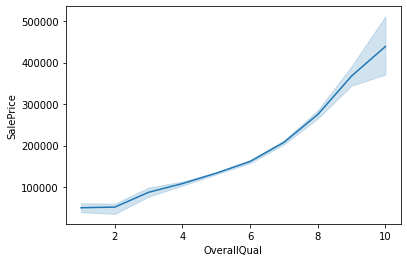

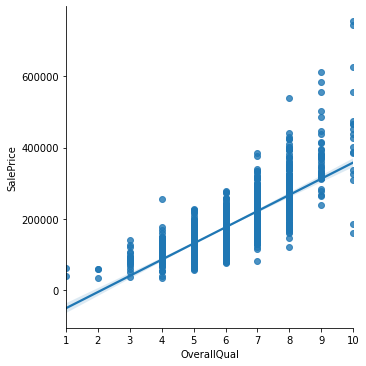

In [13]:
data = pd.concat([dfTrain['SalePrice'], dfTrain['OverallQual'],dfTrain['MSSubClass']], axis=1)
sns.lineplot(x = "OverallQual", y = "SalePrice",data=data,palette="viridis")
sns.lmplot(x="OverallQual",y="SalePrice", data=data);
plt.show()
#2

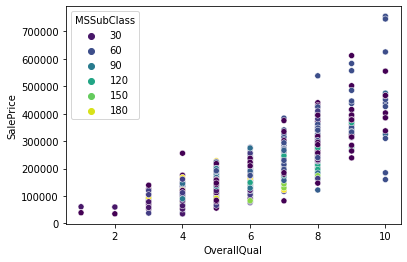

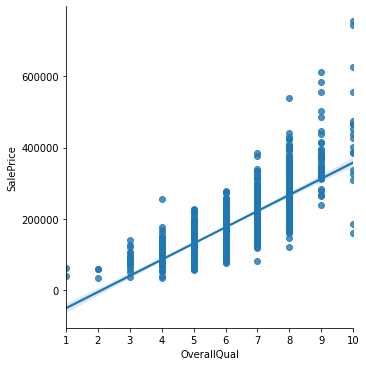

In [14]:
data = pd.concat([dfTrain['SalePrice'], dfTrain['OverallQual'],dfTrain['MSSubClass']], axis=1)
sns.scatterplot(x = "OverallQual", y = "SalePrice",data=data, hue= 'MSSubClass',palette="viridis")
sns.lmplot(x="OverallQual",y="SalePrice", data=data);
plt.show()

#2

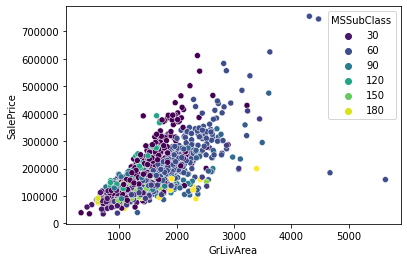

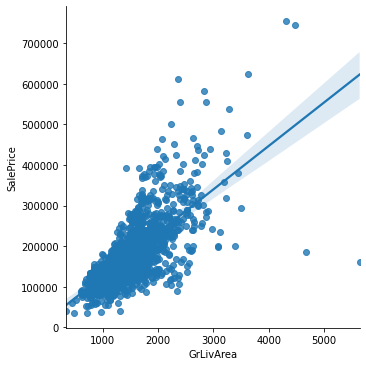

In [15]:
data = pd.concat([dfTrain['GrLivArea'], dfTrain['SalePrice'],dfTrain['MSSubClass']], axis=1)
sns.scatterplot(x = "GrLivArea", y = "SalePrice",data=data, hue= 'MSSubClass',palette="viridis")
sns.lmplot(x="GrLivArea",y="SalePrice", data=data);
plt.show()
#3

In [16]:
import plotly.express as px
fig = px.histogram(dfTrain, x="YrSold")
fig.show()

In [17]:
import plotly.express as px
fig = px.bar(dfTrain, x="MSSubClass", y="SalePrice")
fig.show()


In [18]:
dfTrain.corr().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.00,0.01,-0.01,-0.03,-0.03,0.01,-0.01,-0.02,-0.05,-0.01,-0.01,-0.01,-0.02,0.01,0.01,-0.04,0.01,0.00,-0.02,0.01,0.01,0.04,0.00,0.03,-0.02,0.00,0.02,0.02,-0.03,-0.00,0.00,-0.05,0.00,0.06,-0.01,0.02,0.00,-0.02
MSSubClass,0.01,1.00,-0.39,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.09,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.01,-0.39,1.00,0.43,0.25,-0.06,0.12,0.09,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,-0.01,0.20,0.05,0.26,-0.01,0.35,0.27,0.07,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.21,0.00,0.01,0.01,0.35
LotArea,-0.03,-0.14,0.43,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
OverallQual,-0.03,0.03,0.25,0.11,1.00,-0.09,0.57,0.55,0.41,0.24,-0.06,0.31,0.54,0.48,0.30,-0.03,0.59,0.11,-0.04,0.55,0.27,0.10,-0.18,0.43,0.40,0.55,0.60,0.56,0.24,0.31,-0.11,0.03,0.06,0.07,-0.03,0.07,-0.03,0.79
OverallCond,0.01,-0.06,-0.06,-0.01,-0.09,1.00,-0.38,0.07,-0.13,-0.05,0.04,-0.14,-0.17,-0.14,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.32,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,-0.00,0.07,-0.00,0.04,-0.08
YearBuilt,-0.01,0.03,0.12,0.01,0.57,-0.38,1.00,0.59,0.32,0.25,-0.05,0.15,0.39,0.28,0.01,-0.18,0.20,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.10,0.15,0.83,0.54,0.48,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,-0.02,0.04,0.09,0.01,0.55,0.07,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.64,0.42,0.37,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,-0.05,0.02,0.19,0.10,0.41,-0.13,0.32,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.03,0.28,0.20,0.10,-0.04,0.28,0.25,0.25,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.48
BsmtFinSF1,-0.01,-0.07,0.23,0.21,0.24,-0.05,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.07,0.06,0.00,-0.11,-0.08,0.04,0.26,0.15,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39


Text(0.5, 1.0, 'Correlation matrix')

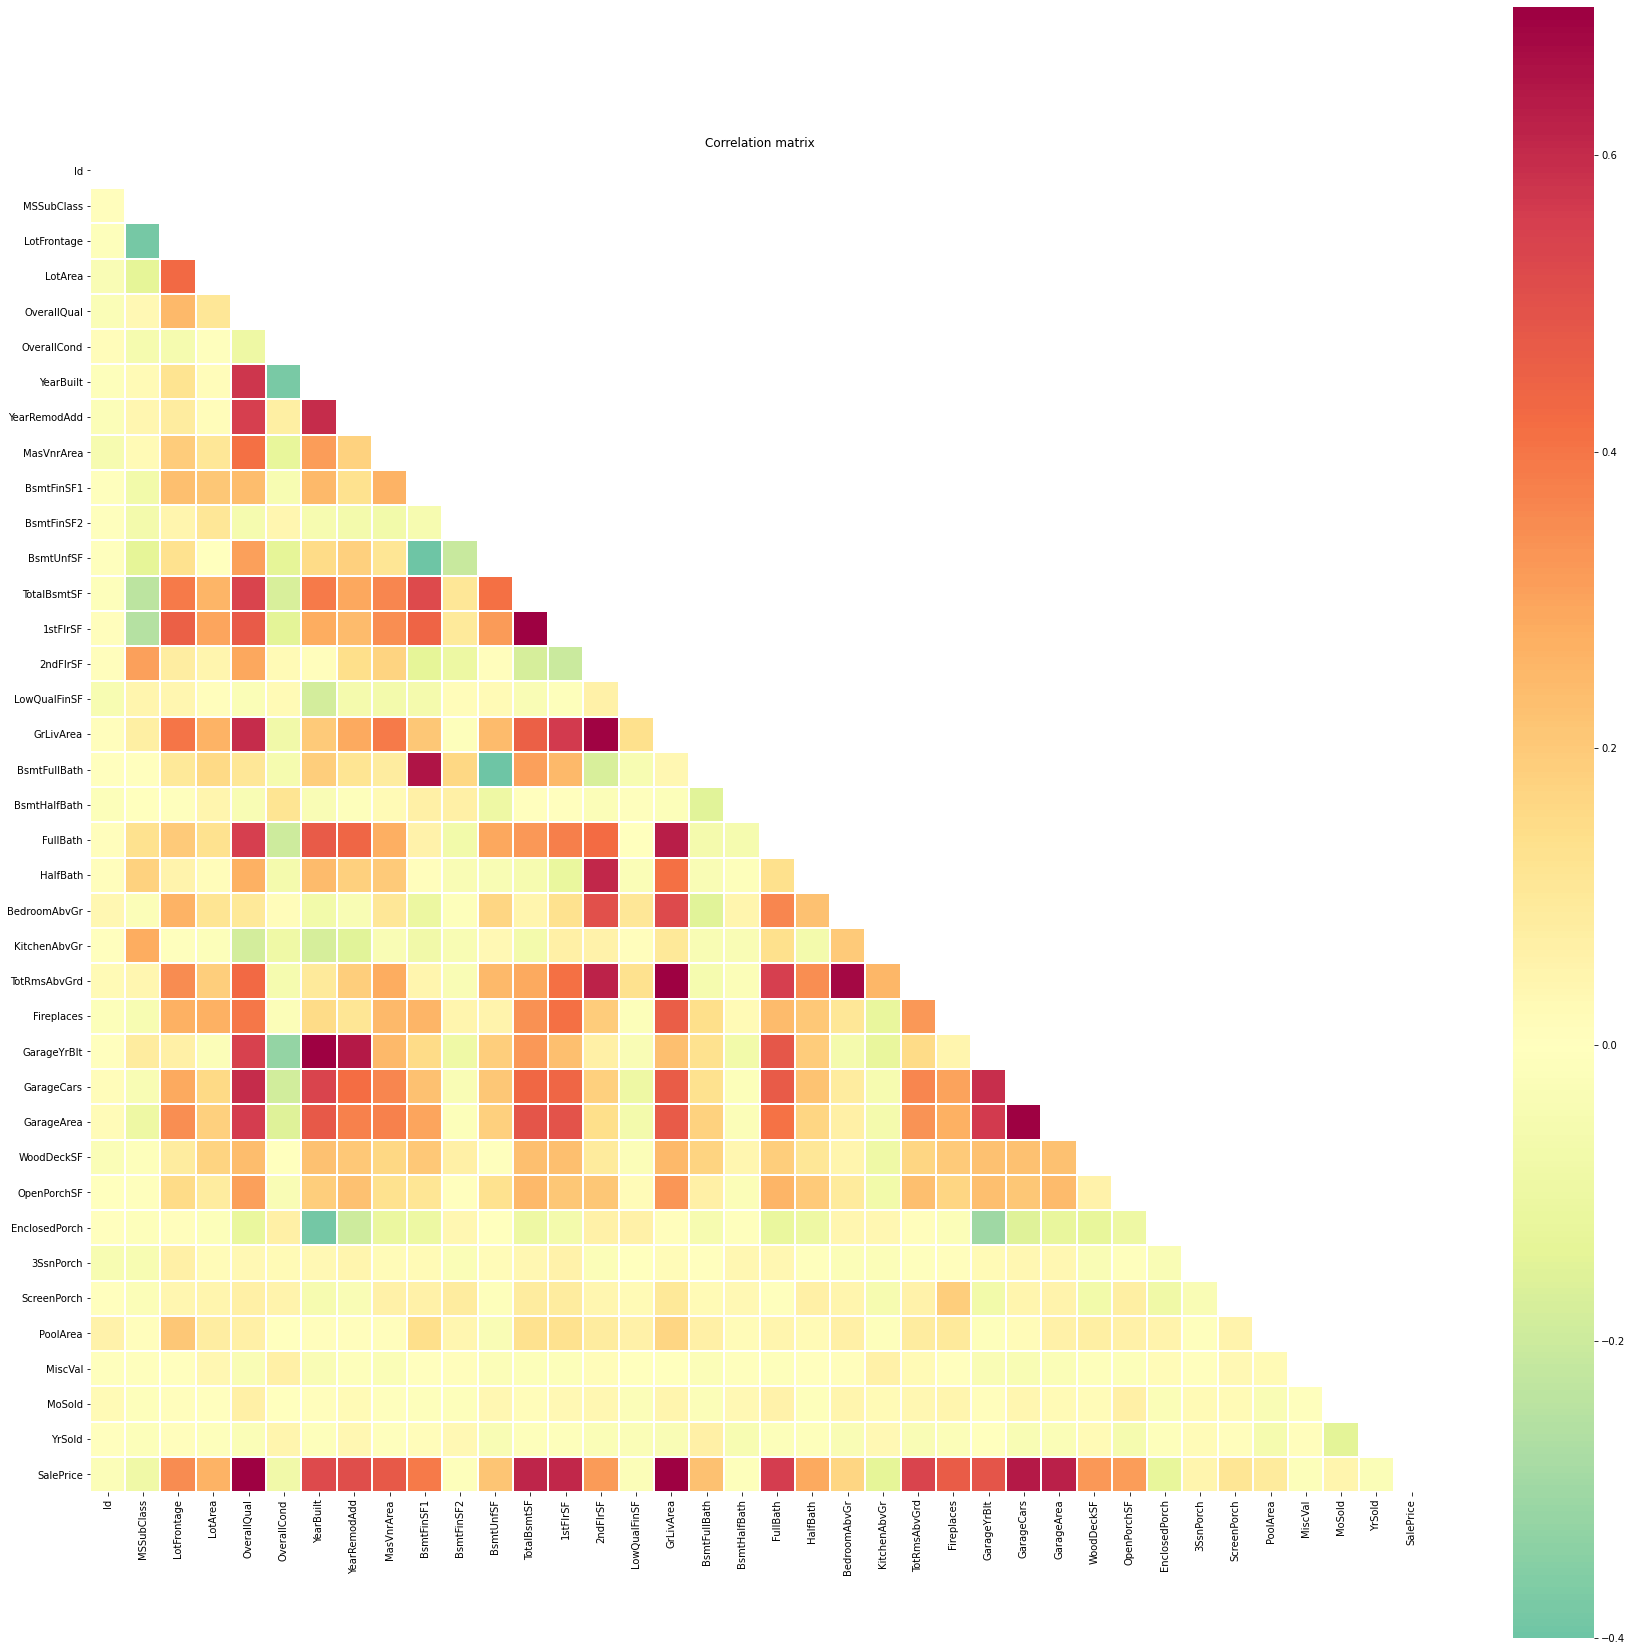

In [19]:
corrs = dfTrain.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,30))
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.7, linewidths=1,center= 0)
plt.title('Correlation matrix')

In [21]:
# The size of the train and test data:

print("Size of the train data: ", dfTrain.shape)
print("Size of the test data: ", dfTest.shape)

Size of the train data:  (1460, 81)
Size of the test data:  (1459, 80)


In [24]:
dfTrain.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
dfTrain.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [27]:
# Let us see the columns that contain NaNs
def missing_values():
    temp_dict = dict()
    for i in dfTrain.columns:
        if dfTrain[i].isnull().sum() > 0: 
            temp_dict[i] = dfTrain[i].isnull().sum()
    return temp_dict
            
# missing features and number of NaN in the features 

#missing_values()

# Few columns/decorations have more than 50% of the data points missing, we will discard those columns.
# uncomment the missing_values() functions called above to look them in detail.

In [28]:
# Deleting the columns which has more than 50% of the missing values

def delete_columns(col):
    if dfTrain[col].isnull().sum() > dfTrain[col].count()/2:
        del dfTrain[col]

for col in dfTrain.columns:
    delete_columns(col)

# let us now look at the columns that still have missing values/NaNs
missing_values()

{'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'Electrical': 1,
 'GarageCond': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'LotFrontage': 259,
 'MasVnrArea': 8,
 'MasVnrType': 8}

In [29]:
# This function predicts the LotFrontage of the missing data values using a Linear Regression model 
# Build a linear regression model with known LotArea and LotFrontage and predicts the LotFrontage for 
# the data with missing values

def fillna_lotfrontage(X_train, y_train):

    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    
    return reg.coef_.tolist()[0], reg.intercept_ 

In [31]:
X_train_list = dfTrain['LotArea'].dropna()[:1000]
X_train = [[X_train_list[i]] for i in range(len(X_train_list))]
y_train = dfTrain['LotFrontage'].dropna()[:1000]

w, intercept = fillna_lotfrontage(X_train, y_train)

for i in range(len(dfTrain["LotFrontage"])):
    if pd.isnull(dfTrain.loc[i, "LotFrontage"]):
        dfTrain.loc[i, "LotFrontage"] = dfTrain.loc[i, "LotArea"]*w + intercept

In [32]:
# No NaN values in the LotFrontage column left
dfTrain["LotFrontage"].isnull().sum()

0

In [33]:
dfTrain = pd.DataFrame(dfTrain)
dfTrain.head(n=5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [34]:
# Let us see the distribution of "MasVnrType" in the data
dfTrain["MasVnrType"].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [35]:
for i in range(len(dfTrain["MasVnrType"])):  
    if pd.isnull(dfTrain.loc[i, "MasVnrType"]) and pd.isnull(dfTrain.loc[i, "MasVnrArea"]):
        dfTrain.loc[i, "MasVnrType"] = "None"
        dfTrain.loc[i, "MasVnrArea"] = 0
        
# NaNs values in both MasVnrType and MasVnrArea are now removed
dfTrain["MasVnrType"].isnull().sum(), dfTrain["MasVnrArea"].isnull().sum()

(0, 0)

In [36]:
 # Let us see the type distribution.
dfTrain["BsmtQual"].describe()
# it seems "TA" repeats most for alomost fifty percent of the data
#  there are four possible options

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

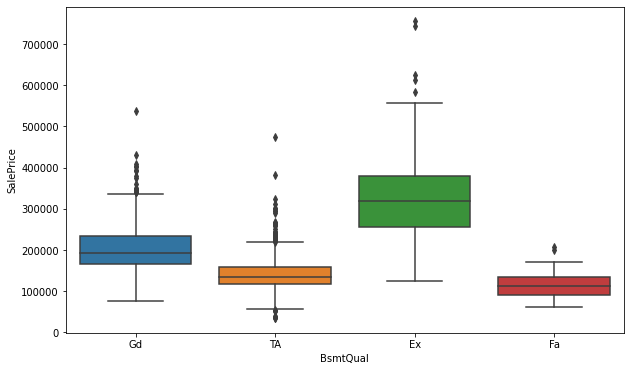

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="BsmtQual", y="SalePrice", data=dfTrain)

In [38]:
# List of the 'BsmtQual' types (four types from the above boxplot)

pd.DataFrame(dfTrain["BsmtQual"].unique()).dropna()[0].tolist()

['Gd', 'TA', 'Ex', 'Fa']

In [39]:
# Replacing the NaNs based on the above boxplot: SalePrice and BsmtQual distribution

for i in range(len(dfTrain["BsmtQual"])):  
    if pd.isnull(dfTrain.loc[i, "BsmtQual"]):
        
        sale_price = dfTrain.loc[i, "SalePrice"]
        
        if 0 < sale_price < 125000:
            dfTrain.loc[i, "BsmtQual"] = 'Fa'
        
        elif 125000 < sale_price < 170000:
            dfTrain.loc[i, "BsmtQual"] = 'TA'
        
        elif 170000 < sale_price < 255000:
            dfTrain.loc[i, "BsmtQual"] = 'Gd'
            
        elif sale_price > 255000:
            dfTrain.loc[i, "BsmtQual"] = 'Ex'
        
# NaNs values in both BsmtQual and MasVnrArea are now removed
dfTrain["BsmtQual"].isnull().sum()

0

In [40]:
dfTrain = pd.DataFrame(dfTrain)
dfTrain.head(n=5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [41]:
# The other columns related with BsmtQual don't have much clear impact on the SalePrice
# Taking the most important variable on the category into consideration, we drop the other
# related columns: 'BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'BsmtCond'.

delete_columns = ['BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'BsmtCond']
for col in delete_columns:
    del dfTrain[col]

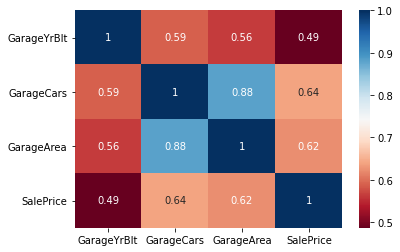

In [42]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish','GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', \
                  'SalePrice']
# Let us plot heatplot diagrams to see the correlation of the above variables on the SalePrice
sns.heatmap(dfTrain[garage_columns].corr(), annot=True, cmap="RdBu")

In [43]:
# Since GarageCars doesn't have any missing values(NaN), we don't have to replace any NaN values here.
# We simply delete the columns that are not important and will not consider ahead for further study.

garage_columns.remove('GarageCars')
garage_columns.remove('SalePrice')
for col in garage_columns:
    # deleting the columns except those two in the garage_columns list we consider 
    del dfTrain[col]

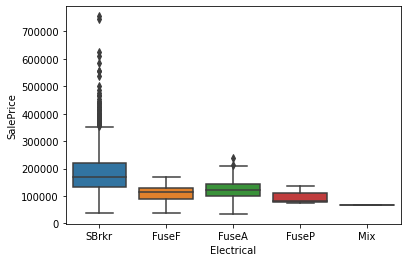

In [45]:
# We have one value NaN in the column 'Electrical'
# Let us see its importance: relation with SalePrice

sns.boxplot(x='Electrical', y='SalePrice', data=dfTrain)

In [46]:

dfTrain['Electrical'].unique()


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [48]:
for i in range(len(dfTrain['Electrical'])):
    if pd.isnull(dfTrain.loc[i, 'Electrical']):
        # print(df_train.loc[i, 'SalePrice'])
        # Checked the value of SalePrice corresponding to the missing Electrical value
        # and the missing value is imputed looking at the above graph
        dfTrain.loc[i, 'Electrical'] = 'SBrkr'
# No NaN left in 'Electrical' column now
dfTrain['Electrical'].isnull().sum()

0

In [49]:
dfTrain.columns, dfTrain.columns.shape[0]


(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
        'SalePri

In [51]:
# separating categorical and numerical variables

variables_list = dfTrain.columns.tolist()
numerical_vars = []
for col in variables_list:
    try:
        if float(dfTrain[col][1]).is_integer():
            numerical_vars.append(col)
    except ValueError: pass

catergorical_vars = set(variables_list) - set(numerical_vars)
#catergorical_vars

# Let us see number of each type of columns/decorations
len(catergorical_vars), len(numerical_vars)

(30, 36)

<Figure size 1008x720 with 0 Axes>

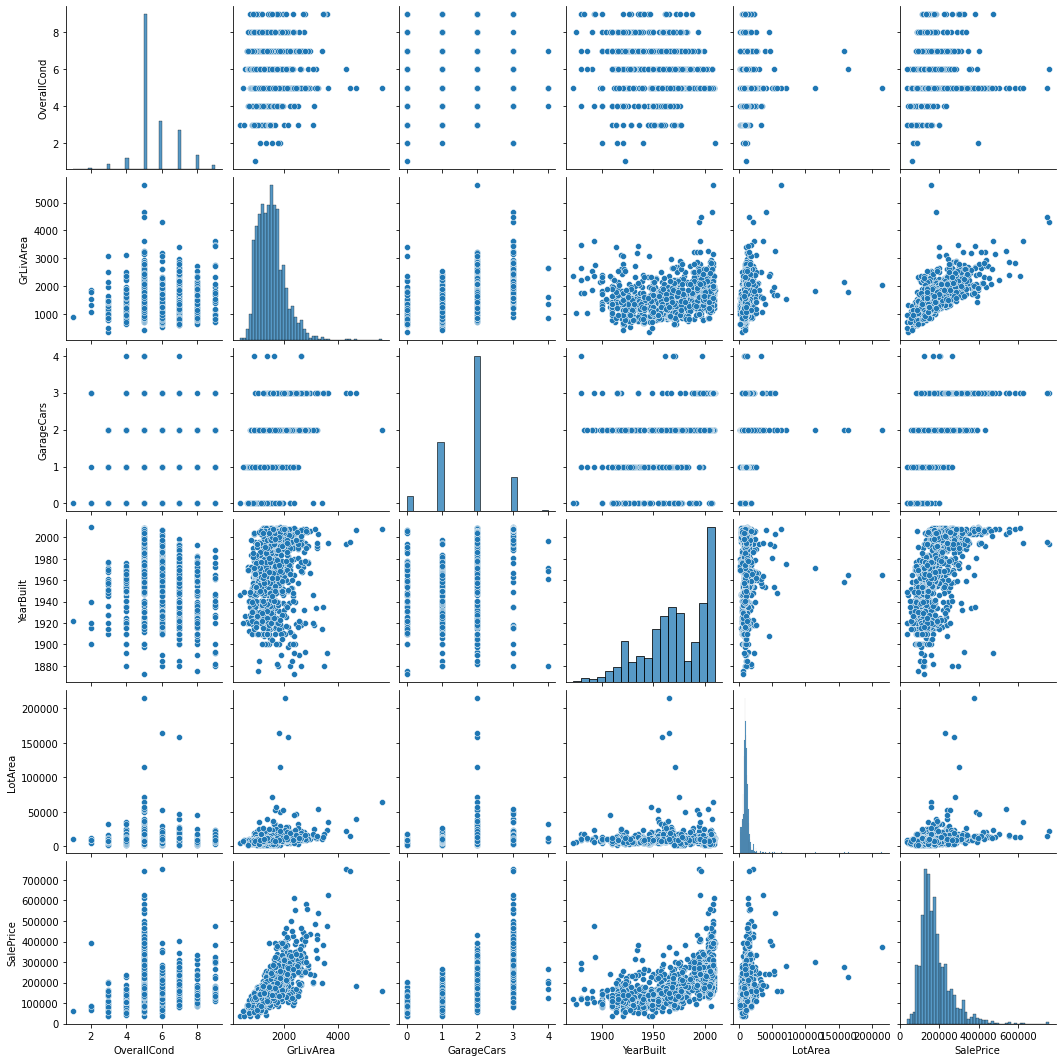

In [53]:
interesting_cols = ["OverallCond", "GrLivArea", "GarageCars", "YearBuilt", "LotArea", "SalePrice"]

plt.figure(figsize=(14,10))
sns.pairplot(dfTrain[interesting_cols], dropna=True)
plt.show()
del interesting_cols

In [55]:
correlation_matrix = dfTrain.drop(["Id"], axis=1).corr()
#plt.figure(figsize=(12,8))
#sns.heatmap(corr_mat, square=False)
#del corr_mat

In [57]:
correlation_matrix = dfTrain.drop(["Id"], axis=1).corr()
#plt.figure(figsize=(12,8))
#sns.heatmap(corr_mat, square=False)
#del corr_mat

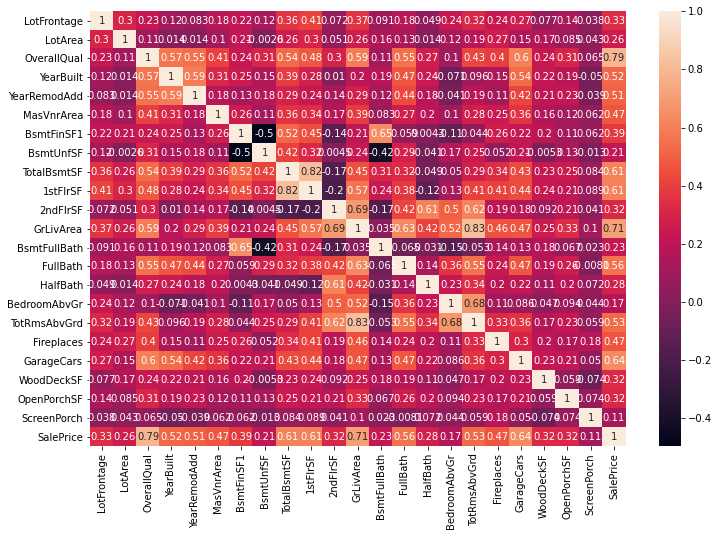

In [58]:
# Let us find out the variable names that have high correlation with SalePrice
# We call these variables important variables.

variables = correlation_matrix.columns
important_variables = []
for row in variables:
    corrl = correlation_matrix.loc[row, 'SalePrice']
    if corrl > 0.1:
        important_variables.append(row)

hp = correlation_matrix.loc[important_variables, important_variables]
plt.figure("Heatmap-Important Variables", figsize=(12,8))
sns.heatmap(hp, annot=True, cbar=True)

In [60]:
# deleting these columns from the dataframe
for col in ['TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch', 'HalfBath']:
    del dfTrain[col]

In [61]:
num_variables = set(numerical_vars) - set(['Id', 'TotRmsAbvGrd', 'BsmtFinSF1', 'BsmtUnfSF', 'ScreenPorch', 'HalfBath'])


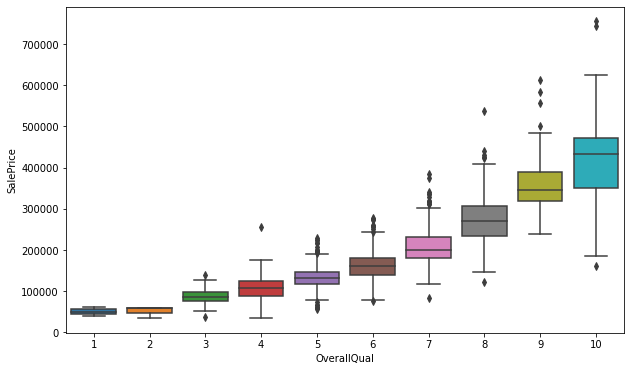

In [63]:
# Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(x="OverallQual", y="SalePrice", data=dfTrain)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



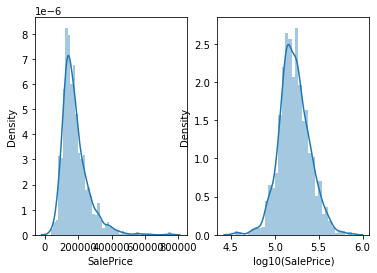

In [65]:
# Data Normalaization
# Normalizing the right skewed SalePrice

fig, ax =plt.subplots(1,2)
sns.distplot(dfTrain['SalePrice'], ax=ax[0])
sns.distplot(np.log10(dfTrain['SalePrice']), ax=ax[1])
plt.xlabel('log10(SalePrice)')
fig.show()

In [67]:
dfTrain.loc[:, 'SalePrice'] = np.round(np.log10(dfTrain['SalePrice']), 3)

In [69]:
# The house price is in logarithmic scale now
dfTrain['SalePrice'].head()

0    5.319
1    5.259
2    5.349
3    5.146
4    5.398
Name: SalePrice, dtype: float64

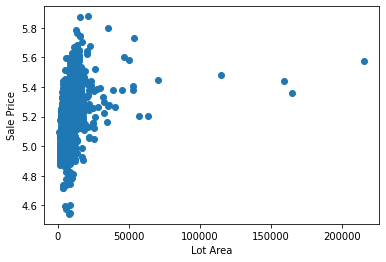

In [71]:
# Plottng the LotArea - SalePrice graph

plt.scatter(dfTrain["LotArea"], dfTrain["SalePrice"])
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()

In [72]:
dfTrain['LotArea'].shape[0]

1460

In [74]:
# the four point's indices (we drop four rows with index names in following list)
drop_index_list = dfTrain[dfTrain['LotArea'] > 100000].index.tolist()
dfTrain.drop(drop_index_list, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


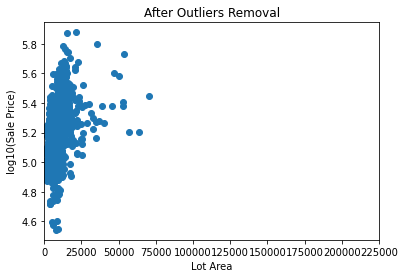

In [75]:
# Again plottng the LotArea - SalePrice graph after the outlier removal

plt.scatter(dfTrain["LotArea"], dfTrain["SalePrice"])
plt.title("After Outliers Removal")
plt.xlabel("Lot Area")
plt.ylabel("log10(Sale Price)")
plt.xlim(0, 225000)
plt.show()

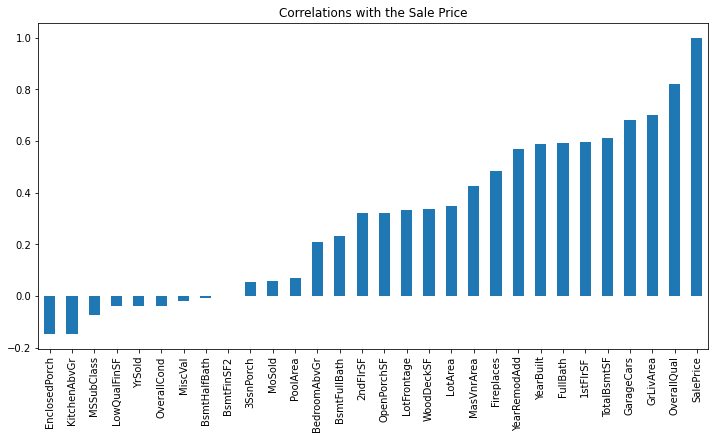

In [77]:
corr_with_SalePrice = dfTrain.drop(["Id"], axis=1).corr()
plot_data = corr_with_SalePrice["SalePrice"].sort_values(ascending=True)
plt.figure(figsize=(12,6))
plot_data.plot.bar()
plt.title("Correlations with the Sale Price")
plt.show()
del plot_data

In [78]:
# creating list of the final numerical columns we are going to consider for the prediction model
num_vars_list = []
for var in num_variables:
    num_vars_list.append(var)

print("Total numerical columns we finally have is: ", len(num_vars_list))

Total numerical columns we finally have is:  30


In [80]:
categorical_list = list()
for i in catergorical_vars:
    categorical_list.append(i)
# Let us see all the possible categories in all of the categorical variables
for col in categorical_list:
    print(col, ": ", dfTrain[col].unique())

CentralAir :  ['Y' 'N']
RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Heating :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
MasVnrType :  ['BrkFace' 'None' 'Stone' 'BrkCmn']
SaleCondition :  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
Exterior1st :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
HeatingQC :  ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual :  ['Gd' 'TA' 'Ex' 'Fa']
LandSlope :  ['Gtl' 'Mod' 'Sev']
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
ExterCond :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
SaleType :  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS']
Exterior2nd :  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd 

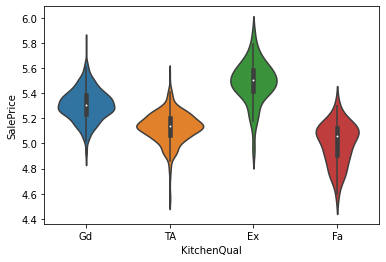

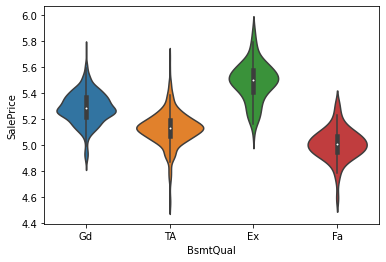

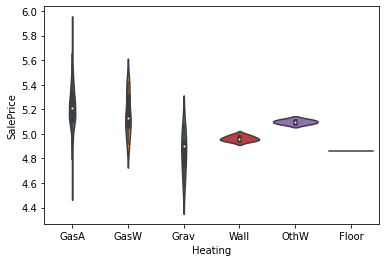

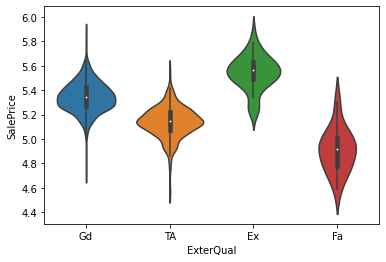

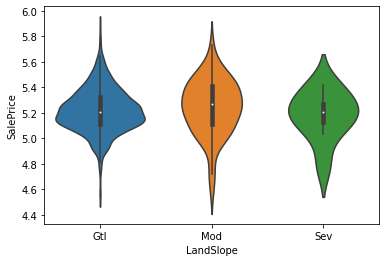

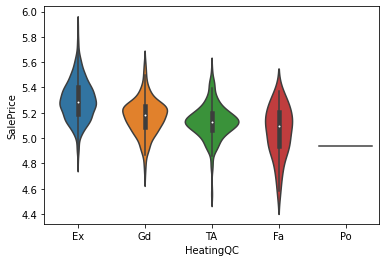

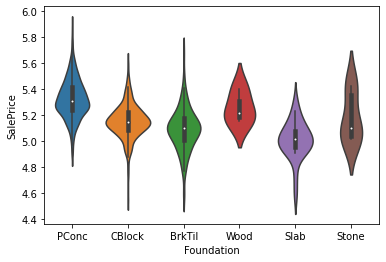

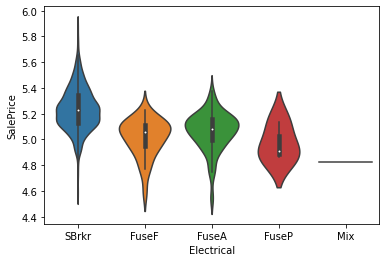

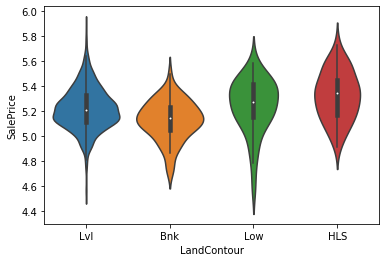

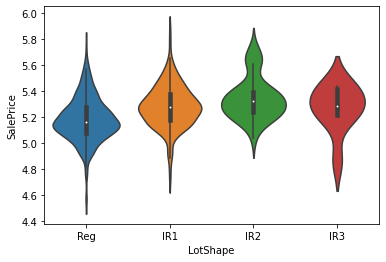

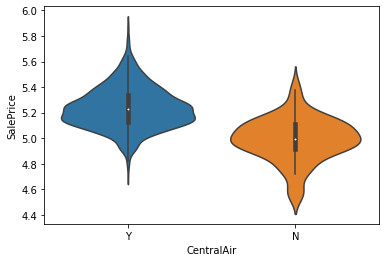

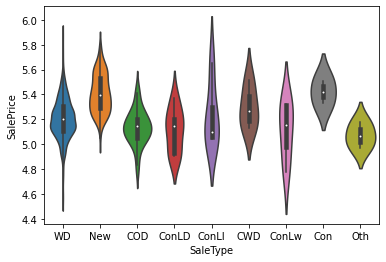

In [83]:
# violinplot: for all columns/decorations in the categorical column list

few_cat_variables = ['KitchenQual', 'BsmtQual', 'Heating', 'ExterQual', 'LandSlope', 'HeatingQC', 'Foundation', 'Electrical', \
                     'LandContour', 'LotShape', 'CentralAir', 'SaleType']
# categorical_list => plotted all the variables in this list before showing only few of them in the above list
for i in range(len(few_cat_variables)):
    sns.violinplot(x=few_cat_variables[i], y='SalePrice', data=dfTrain)
    plt.show()

In [89]:
important_categorical_vars = ['KitchenQual', 'BsmtQual', 'Heating', 'ExterQual']

# Let us once again categories of these important variables
for col in important_categorical_vars:
    print(col, ": ", dfTrain[col].unique())

KitchenQual :  ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual :  ['Gd' 'TA' 'Ex' 'Fa']
Heating :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
ExterQual :  ['Gd' 'TA' 'Ex' 'Fa']


In [90]:
# dataframe now contains only the numerical variables
all_vars_now = num_vars_list + important_categorical_vars
# The df_train ahead contains only these - all_vars_now variables
dfTrain = dfTrain[all_vars_now]

In [91]:
# This function takes in the categorical variables and introduces the numerical variable columns for 
# each of the categories for that categorical variables/columns/decorations in the original data
# For each of original categorical columns - will be added separate columns in df_frame for each of the categories
def numerical_columns(cat_var):
    # new DataFrame for the categorical variable cat_var
    df = pd.get_dummies(dfTrain[cat_var], dummy_na=None)
    df_vars = df.columns
    modified_vars = [(cat_var + "-" + i) for i in df_vars]
    # new columns added in df_frame for each of the categories in cat_var
    for i in range(len(modified_vars)):
        dfTrain[modified_vars[i]] = pd.Series(df[df_vars[i]]).tolist()
    # making the modified_vars list empty for next cat_var
    modified_vars = []

In [92]:
# Calling numerical_columns function to intoduce new categorical columns as numerical values

for cat_var in important_categorical_vars:
    numerical_columns(cat_var)
# Run only once

In [94]:
# Now deleting the original categorical form of the variables converted into the numerical form
for var in important_categorical_vars:
    del dfTrain[var]

In [96]:
# The dataframe we now have is ready to use in the regression model 
# we finally have 48 columns in the dataframe
dfTrain.tail()
# Ready to build regression model now

,YearBuilt,MasVnrArea,Fireplaces,MiscVal,1stFlrSF,MSSubClass,3SsnPorch,YrSold,BsmtFullBath,BsmtHalfBath,OverallCond,OpenPorchSF,BsmtFinSF2,PoolArea,SalePrice,OverallQual,GarageCars,BedroomAbvGr,KitchenAbvGr,LotArea,EnclosedPorch,MoSold,FullBath,WoodDeckSF,TotalBsmtSF,YearRemodAdd,LotFrontage,GrLivArea,LowQualFinSF,2ndFlrSF,KitchenQual-Ex,KitchenQual-Fa,KitchenQual-Gd,KitchenQual-TA,BsmtQual-Ex,BsmtQual-Fa,BsmtQual-Gd,BsmtQual-TA,Heating-Floor,Heating-GasA,Heating-GasW,Heating-Grav,Heating-OthW,Heating-Wall,ExterQual-Ex,ExterQual-Fa,ExterQual-Gd,ExterQual-TA
1455,1999,0.0,1,0,953,60,0,2007,0,0,5,40,0,0,5.243,6,2,3,1,7917,0,8,2,0,953,2000,62.0,1647,0,694,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1456,1978,119.0,2,0,2073,20,0,2010,1,0,6,0,163,0,5.322,6,2,3,1,13175,0,2,2,349,1542,1988,85.0,2073,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1457,1941,0.0,2,2500,1188,70,0,2010,0,0,9,60,0,0,5.426,7,1,4,1,9042,0,5,2,0,1152,2006,66.0,2340,0,1152,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1458,1950,0.0,0,0,1078,20,0,2010,1,0,6,0,1029,0,5.153,5,1,2,1,9717,112,4,1,366,1078,1996,68.0,1078,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1459,1965,0.0,0,0,1256,20,0,2008,1,0,6,68,290,0,5.169,5,1,3,1,9937,0,6,1,736,1256,1965,75.0,1256,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [97]:
# Importing sklearn methods
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [99]:
# reassigning the final DataFrame from analysis above as df
df = dfTrain
df.columns

Index(['YearBuilt', 'MasVnrArea', 'Fireplaces', 'MiscVal', '1stFlrSF',
       'MSSubClass', '3SsnPorch', 'YrSold', 'BsmtFullBath', 'BsmtHalfBath',
       'OverallCond', 'OpenPorchSF', 'BsmtFinSF2', 'PoolArea', 'SalePrice',
       'OverallQual', 'GarageCars', 'BedroomAbvGr', 'KitchenAbvGr', 'LotArea',
       'EnclosedPorch', 'MoSold', 'FullBath', 'WoodDeckSF', 'TotalBsmtSF',
       'YearRemodAdd', 'LotFrontage', 'GrLivArea', 'LowQualFinSF', '2ndFlrSF',
       'KitchenQual-Ex', 'KitchenQual-Fa', 'KitchenQual-Gd', 'KitchenQual-TA',
       'BsmtQual-Ex', 'BsmtQual-Fa', 'BsmtQual-Gd', 'BsmtQual-TA',
       'Heating-Floor', 'Heating-GasA', 'Heating-GasW', 'Heating-Grav',
       'Heating-OthW', 'Heating-Wall', 'ExterQual-Ex', 'ExterQual-Fa',
       'ExterQual-Gd', 'ExterQual-TA'],
      dtype='object')

In [100]:
# Separating 'SalePrice' column

X_columns = df.columns.tolist()
X_columns.remove('SalePrice')

In [101]:
# The input data for the regression models are:

X = df[X_columns]
y = df['SalePrice']

In [102]:
# The input data: dividing into train (75%) and validation data (25%)

x_train_len = round(X.shape[0]*0.75)
x_train = X[:x_train_len]
x_validation = X[x_train_len:]
y_train = y[:x_train_len]
y_validation = y[x_train_len:]

# print Test and Validation data lenght
print("Train data points: ", x_train_len)
print("Validation data points: ", x_validation.shape[0])


Train data points:  1092
Validation data points:  364


In [103]:
x_train.head()


,YearBuilt,MasVnrArea,Fireplaces,MiscVal,1stFlrSF,MSSubClass,3SsnPorch,YrSold,BsmtFullBath,BsmtHalfBath,OverallCond,OpenPorchSF,BsmtFinSF2,PoolArea,OverallQual,GarageCars,BedroomAbvGr,KitchenAbvGr,LotArea,EnclosedPorch,MoSold,FullBath,WoodDeckSF,TotalBsmtSF,YearRemodAdd,LotFrontage,GrLivArea,LowQualFinSF,2ndFlrSF,KitchenQual-Ex,KitchenQual-Fa,KitchenQual-Gd,KitchenQual-TA,BsmtQual-Ex,BsmtQual-Fa,BsmtQual-Gd,BsmtQual-TA,Heating-Floor,Heating-GasA,Heating-GasW,Heating-Grav,Heating-OthW,Heating-Wall,ExterQual-Ex,ExterQual-Fa,ExterQual-Gd,ExterQual-TA
0,2003,196.0,0,0,856,60,0,2008,1,0,5,61,0,0,7,2,3,1,8450,0,2,2,0,856,2003,65.0,1710,0,854,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,1976,0.0,1,0,1262,20,0,2007,0,1,8,0,0,0,6,2,3,1,9600,0,5,2,298,1262,1976,80.0,1262,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,2001,162.0,1,0,920,60,0,2008,1,0,5,42,0,0,7,2,3,1,11250,0,9,2,0,920,2002,68.0,1786,0,866,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1915,0.0,1,0,961,70,0,2006,1,0,5,35,0,0,7,3,3,1,9550,272,2,1,0,756,1970,60.0,1717,0,756,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,2000,350.0,1,0,1145,60,0,2008,1,0,5,84,0,0,8,3,4,1,14260,0,12,2,192,1145,2000,84.0,2198,0,1053,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [104]:
# A class that will define all the regression models as methods

class Models(object):
    
    global seed 
    seed = 34234
    
    # Initialization 
    def __init__(self, x_train, x_validation, y_train, y_validation):
        # changing input as dataframe to list
        self.x_train = [x_train.iloc[i].tolist() for i in range(len(x_train))]
        self.x_validation = [x_validation.iloc[i].tolist() for i in range(len(x_validation))]
        self.y_train = y_train.tolist()
        self.y_validation = y_validation.tolist()
    
    
    @staticmethod
    def print_info(cross_val_scores, mse):
        print("Cross Validation Scores: ", cross_val_scores)
        print("Mean Squared Error: ", mse)
        
        
    # Linear Regression 
    def linear_regression(self, x_train, x_validation,  y_train, y_validation):
        reg = linear_model.LinearRegression()
        # X = np.array(X).reshape([-1, 1])
        reg.fit(self.x_train, self.y_train)
        y_pred_list = reg.predict(self.x_validation)
        mse = mean_squared_error(self.y_validation, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(reg, self.x_train, self.y_train, cv=kfold)
        print("\nLinear Regression Model")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
        
    # Random Forest Regression model 
    def random_forest(self, x_train, x_validation,  y_train, y_validation):
        rfr = RandomForestRegressor(n_estimators=8, max_depth=8, random_state=12, verbose=0)
        # X = np.array(X).reshape([-1, 1])
        rfr.fit(self.x_train, self.y_train)
        y_pred_list = rfr.predict(self.x_validation)
        mse = mean_squared_error(self.y_validation, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(rfr, self.x_train, self.y_train, cv=kfold)
        print("\nRandom Forest Regressor")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
            
    # Lasso method 
    def lasso(self, x_train, x_validation,  y_train, y_validation):
        reg = linear_model.Lasso(alpha = 0.1)
        # X = np.array(X).reshape([-1, 1])
        reg.fit(self.x_train, self.y_train)
        y_pred_list = reg.predict(self.x_validation)
        mse = mean_squared_error(self.y_validation, y_pred_list)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(reg, self.x_train, self.y_train, cv=kfold)
        print("\nLasso Regression Model")
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse
    
    # Gradient Boosing Regressor
    def GBR(self, x_train, x_validation,  y_train, y_validation):
        gbr = GradientBoostingRegressor(n_estimators=175, learning_rate=0.08, max_depth=3, random_state=1232, loss='ls')
        gbr.fit(self.x_train, self.y_train)
        kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
        cross_val_scores = cross_val_score(gbr, self.x_train, self.y_train, cv=kfold)
        mse = mean_squared_error(self.y_validation, gbr.predict(self.x_validation))
        print('\nGradient Boosting Regressor')
        self.print_info(cross_val_scores, mse)
        return cross_val_scores, mse

In [106]:
# We use GridSearchCV to find out the best set of parameters for GBR and use it for the 
# regression model analysis and prediction
parameters = {
    'n_estimators' : [170, 175, 180],
    'learning_rate' : [0.075, 0.08, 0.1],
    'max_depth' : [2, 3, 4]
}

gbr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, max_depth=5, random_state=232, loss='ls')
gs_cv = GridSearchCV(gbr, parameters).fit(x_train, y_train)
gs_cv.best_params_

{'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 180}

In [107]:
from types import FunctionType

methods = [x for x, y in Models.__dict__.items() if type(y) == FunctionType]
methods.remove('__init__')
# Now calling the all regression methods
cross_scores_list, mse_list = [], []
for model in methods:
    reg = Models(x_train, x_validation, y_train, y_validation)
    cross_val_scores, mse = getattr(reg, model)(x_train, x_validation, y_train, y_validation)
    cross_scores_list.append(cross_val_scores)
    mse_list.append(mse)


Linear Regression Model
Cross Validation Scores:  [0.87227481 0.67548551 0.90449058 0.94104202 0.88030722 0.86738322
 0.91915433 0.85141731 0.86277597 0.88193279]
Mean Squared Error:  0.006429722999282012

Random Forest Regressor
Cross Validation Scores:  [0.81149257 0.77718248 0.83342614 0.93488303 0.86089034 0.81737068
 0.87327066 0.80853621 0.81020445 0.83943838]
Mean Squared Error:  0.004613867228867433

Lasso Regression Model
Cross Validation Scores:  [0.82184587 0.52314476 0.83037432 0.88987935 0.82755409 0.80340219
 0.85437577 0.79259173 0.7718063  0.7945476 ]
Mean Squared Error:  0.01125654816054302

Gradient Boosting Regressor
Cross Validation Scores:  [0.86819393 0.78108136 0.88412937 0.94433847 0.8893322  0.85492818
 0.92361085 0.85482382 0.85983126 0.89479595]
Mean Squared Error:  0.003483377066849543


In [110]:
plot_df = pd.DataFrame()
for i in range(len(methods)):
    plot_df[methods[i]] = cross_scores_list[i]

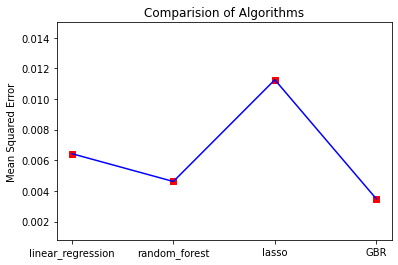

In [116]:
# Plot Mean Squared Error

plt.plot(mse_list, c='b')
plt.title('Comparision of Algorithms')
plt.ylabel('Mean Squared Error')
plt.ylim(0.0008, 0.015)
x = np.array([0,1,2,3])
plt.scatter(x, mse_list, c='r', marker="s")
plt.xticks(x, methods)
plt.show()

In [ ]:
#Prediction with Test Data
#TODO: Now, we need to clean test data into the form our prediction model takes as input and predict the 'SalePrice' of the houses.